# 2 Data Wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load the Data](#2.4_Load-the-Data)
  * [2.5 Explore the Data](#2.5_Explore-the-Data)
  * [2.6 Look at missing values](#2.6_Look-at-missing-values)
      * [2.6.1 Columns with the most missing values](#2.6.1-Columns-with-the-most-missing-values)
  * [2.7 Data types](#2.7-Data-types)
  * [2.8 Initial column drops](#2.8-Initial-column-drops)
  * [2.9 Initial data cleaning](#2.9-Initial-data-cleaning)
  * [2.10 Data descriptions](#2.10-Data-descriptions)
  * [2.11 Missing Data Second Look](#2.11-Missing-Data-Second-Look)
  * [2.12 Look at object columns](#2.12-Look-at-object-columns)
  * [2.13 Bar plots of the features](#2.13-Bar-plots-of-the-features)
  * [2.14 Save the data](#2.14-Save-the-data)
  * [2.15 Summary](#2.15-Summary)

## 2.2 Introduction<a id='2.2_Introduction'></a>
From Kaggle - Lending Club is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market.

Lending Club enables borrowers to create unsecured personal loans between $1,000 and $40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers and origination fee and investors a service fee.

In this notebook I will focus on collecting the data, organizing it, and making sure it's well defined. This is a large data set with 74 columns and over 800,000 rows. While cleaning the data, I will end up deleting some columns and rows but, overall, I would like to keep most of the columns until I decide which features will be useful for my model. 


## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2.4 Load the Data<a id='2.4_Load the Data'></a>

For information about each column - https://www.rdocumentation.org/packages/creditmodel/versions/1.0/topics/lendingclub

In [2]:
# read in csv data - training set
lending_data = pd.read_csv('../raw_data/lc_loan.csv')

C:\Users\McD\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# read in csv data - test set
lending_data_test = pd.read_csv('../raw_data/lc_2016_2017.csv')

C:\Users\McD\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 2.5 Explore the Data<a id='2.5_Explore the Data'></a>

In [4]:
lending_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# what does lending_data look like?
print(lending_data.shape)
print(lending_data.columns)

(887379, 74)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status

In [6]:
lending_data_test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [7]:
# what does lending_data_test look like?
print(lending_data_test.shape)
print(lending_data_test.columns)

(759338, 72)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint'

It looks like there are two less columns in the test set than the training set. This will require a closer look. First, I want to look at which column could make a good index. 

In [8]:
# id: A unique LC assigned ID for the loan listing.
# member_id: A unique LC assigned Id for the borrower member.
# based on the column descriptions, it looks like 'id' or 'member_id' would be a good choice for the index
lending_data[['id', 'member_id']].nunique()

id           887379
member_id    887379
dtype: int64

In [9]:
lending_data_test[['id', 'member_id']].nunique()

id           759338
member_id         0
dtype: int64

The 'member_id' column in the test data is missing values. Therefore, it looks like the 'id' column would be the best choice for the index.

Next, I will take a closer look which columns are in the training data but not in test.

In [10]:
#taken from datascience.stackexchange.com to look at which columns are the same between the two dataframes
list(set(lending_data.columns).intersection(set(lending_data_test.columns)))

['tot_cur_bal',
 'member_id',
 'total_rec_int',
 'title',
 'last_pymnt_amnt',
 'acc_now_delinq',
 'last_pymnt_d',
 'application_type',
 'id',
 'verification_status_joint',
 'total_rec_prncp',
 'funded_amnt',
 'open_acc_6m',
 'next_pymnt_d',
 'installment',
 'total_cu_tl',
 'grade',
 'sub_grade',
 'annual_inc',
 'inq_last_6mths',
 'open_il_12m',
 'emp_length',
 'loan_amnt',
 'mths_since_last_delinq',
 'total_pymnt_inv',
 'recoveries',
 'total_acc',
 'issue_d',
 'total_bal_il',
 'int_rate',
 'emp_title',
 'purpose',
 'total_pymnt',
 'last_credit_pull_d',
 'open_il_24m',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'il_util',
 'revol_util',
 'dti',
 'open_rv_24m',
 'desc',
 'mths_since_rcnt_il',
 'mths_since_last_major_derog',
 'max_bal_bc',
 'addr_state',
 'zip_code',
 'collection_recovery_fee',
 'inq_fi',
 'all_util',
 'mths_since_last_record',
 'annual_inc_joint',
 'tot_coll_amt',
 'verification_status',
 'earliest_cr_line',
 'term',
 'revol_bal',
 'dti_joint',
 'loan_status',
 'hom

In [11]:
# Looking at which columns are in lending_data but not lending_data_test
list(set(lending_data.columns).difference(set(lending_data_test.columns)))

['url', 'open_il_6m']

In [12]:
# Looking at which columns are in lending_data_test but not lending_data
list(set(lending_data_test.columns).difference(set(lending_data.columns)))

[]

It looks like all of the columns in the test set are in the training set but 'url' and 'open_il_6m' are in the training set and not in test. It would make sense to drop these two columns.

## 2.6 Look at missing values<a id='2.6_Look at missing values'></a>

In [13]:
# Looking at missing values by columns
# copied from the guided capstone
missing_train = pd.concat([lending_data.isnull().sum(), 100 * lending_data.isnull().mean()], axis=1)
missing_train.columns=['count', '%']
missing_train.sort_values(by='%', ascending=False).head(40)

,count,%
dti_joint,886870,99.942640
annual_inc_joint,886868,99.942415
verification_status_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
open_acc_6m,866007,97.591559
open_il_6m,866007,97.591559
open_il_12m,866007,97.591559
open_il_24m,866007,97.591559
total_bal_il,866007,97.591559


In [14]:
# Looking at missing values in test set by columns
missing_test = pd.concat([lending_data_test.isnull().sum(), 100 * lending_data_test.isnull().mean()], axis=1)
missing_test.columns=['count', '%']
missing_test.sort_values(by='%', ascending=False).head(15)

,count,%
member_id,759338,100.000000
desc,759321,99.997761
dti_joint,725337,95.522284
verification_status_joint,725335,95.522020
annual_inc_joint,725335,95.522020
mths_since_last_record,618159,81.407621
mths_since_last_major_derog,544233,71.672035
mths_since_last_delinq,362705,47.765949
next_pymnt_d,167915,22.113341
il_util,100595,13.247724


### 2.6.1 Columns with the most missing values:<a id='2.6.1_Columns with the most missing values'></a>
- dti_joint: A ratio calculated using the co:borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co:borrowers' combined self:reported monthly income
- annual_inc_joint: The combined self:reported annual income provided by the co:borrowers during registration
- verified_status_joint: Indicates if the co:borrowers' joint income was verified by LC, not verified, or if the income source was verified
- il_util: Ratio of total current balance to high credit/credit limit on all install acct
- mths_since_rcnt_il: Months since most recent installment accounts opened
- open_acc_6m: Number of open trades in last 6 months
- open_il_12m: Number of installment accounts opened in past 12 months
- open_il_24m: Number of installment accounts opened in past 24 months
- total_bal_il: Total current balance of all installment accounts
- inq_last_12m: Number of credit inquiries in past 12 months
- open_rv_12m: Number of revolving trades opened in past 12 months
- open_rv_24m: Number of revolving trades opened in past 24 months
- max_bal_bc: Maximum current balance owed on all revolving accounts
- all_util: Balance to credit limit on all trades
- inq_fi: Number of personal finance inquiries
- total_cu_tl: Number of finance trades
- desc: Loan description provided by the borrower
- mths_since_last_record: The number of months since the last public record.
- mths_since_last_major_derog: Months since most recent 90:day or worse rating
- mths_since_last_delinq: The number of months since the borrower's last delinquency.

There are quite a few columns that are mostly empty. I will start dropping columns in the initial data cleaning but, for now, I will continue to see what I do have in the data.

## 2.7 Data types<a id='2.7 Data types'></a>
First look at each column's data type.

In [15]:
lending_data.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 74, dtype: object

In [16]:
# taking a look at which columns are objects
lending_data.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint'],
      dtype='object')

## 2.8 Initial column drops<a id='2.8 Initial column drops'></a>
First I am going to drop the columns from the training set that are not in the test set. These are 'url' and 'open_il_6m'. Then I will drop the columns with more than 50% missing values.  

In [17]:
dropColumns = ['url', 'open_il_6m']
lending_data_drop = lending_data.drop(dropColumns, axis=1)

In [18]:
# Check to make sure there are no columns in training that are not in test
list(set(lending_data_drop.columns).difference(set(lending_data_test.columns)))

[]

In [19]:
# dropping columns that are over 50% empty in the training set
dropCol = ['dti_joint', 'annual_inc_joint', 'verification_status_joint', 'il_util', 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_12m', 
'open_il_24m', 'total_bal_il', 'inq_last_12m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'desc', 
'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq']
lending_data_drop2 = lending_data_drop.drop(dropCol, axis=1)

In [20]:
# dropping same columns from the test data
lending_data_test_drop = lending_data_test.drop(dropCol, axis=1)

In [21]:
# check shape of both data sets
print(lending_data_drop2.shape)
print(lending_data_test_drop.shape)

(887379, 52)
(759338, 52)


Next, I'm going to drop the member_id and zip_code columns from both. I will also set 'id' as the index for both sets. 

In [22]:
# drop ['member_id', 'zip_code']
lending_data_drop3 = lending_data_drop2.drop(['member_id', 'zip_code'], axis=1)
lending_data_test_drop2 = lending_data_test_drop.drop(['member_id', 'zip_code'], axis=1)

In [23]:
print(lending_data_drop3.shape)
print(lending_data_test_drop2.shape)

(887379, 50)
(759338, 50)


In [24]:
# re-index on id 
ld_index = lending_data_drop3.set_index('id')
ld_test_index = lending_data_test_drop2.set_index('id')

In [25]:
ld_index.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1075358,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [26]:
ld_test_index.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
112435993,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,...,77.08,Jan-2018,Dec-2017,0,1,Individual,0,0.0,3911.0,7100.0
112290210,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,...,360.95,Jan-2018,Dec-2017,0,1,Individual,0,0.0,234457.0,31900.0
112436985,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,7 years,...,209.01,Jan-2018,Dec-2017,0,1,Individual,0,0.0,121311.0,27700.0
112439006,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,10+ years,...,652.91,Jan-2018,Dec-2017,0,1,Individual,0,0.0,62335.0,46900.0
112438929,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,10+ years,...,431.73,Jan-2018,Dec-2017,0,1,Individual,0,0.0,15332.0,7800.0


## 2.9 Initial data cleaning<a id='2.9 Initial data cleaning'></a> 

If I put 'months' into the 'terms' column name, I can take it out of the fields and that would then be integers instead of object type.

In [27]:
# rename term column, take 'months' out of each value, and change to integer values
ld_index.rename(columns={"term": "term(months)"}, inplace=True)
ld_index['term(months)'] = ld_index['term(months)'].map(lambda x: x.rstrip('months'))
ld_index['term(months)'] = ld_index['term(months)'].astype(int)
print(ld_index['term(months)'].head())

id
1077501    36
1077430    60
1077175    36
1076863    36
1075358    60
Name: term(months), dtype: int32


In [28]:
# rename term column, take 'months' out of each value, and change to integer values
ld_test_index.rename(columns={"term": "term(months)"}, inplace=True)
ld_test_index['term(months)'] = ld_test_index['term(months)'].map(lambda x: x.rstrip('months'))
ld_test_index['term(months)'] = ld_test_index['term(months)'].astype(int)
print(ld_test_index['term(months)'].head())

id
112435993    36
112290210    60
112436985    36
112439006    36
112438929    36
Name: term(months), dtype: int32


## 2.10 Data descriptions<a id='2.10 Data descriptions'></a> 

In [29]:
ld_index.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,887379.0,14755.264605,8435.455601,500.00,8000.000,13000.000000,20000.000000,3.500000e+04
funded_amnt,887379.0,14741.877625,8429.897657,500.00,8000.000,13000.000000,20000.000000,3.500000e+04
funded_amnt_inv,887379.0,14702.464383,8442.106732,0.00,8000.000,13000.000000,20000.000000,3.500000e+04
term(months),887379.0,43.201090,10.998663,36.00,36.000,36.000000,60.000000,6.000000e+01
int_rate,887379.0,13.246740,4.381867,5.32,9.990,12.990000,16.200000,2.899000e+01
installment,887379.0,436.717127,244.186593,15.67,260.705,382.550000,572.600000,1.445460e+03
annual_inc,887375.0,75027.587761,64698.300142,0.00,45000.000,65000.000000,90000.000000,9.500000e+06
dti,887379.0,18.157039,17.190626,0.00,11.910,17.650000,23.950000,9.999000e+03
delinq_2yrs,887350.0,0.314442,0.862244,0.00,0.000,0.000000,0.000000,3.900000e+01
inq_last_6mths,887350.0,0.694623,0.998448,0.00,0.000,0.000000,1.000000,3.300000e+01


In [30]:
ld_test_index.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,759338.0,14707.775260,9215.456493,1.000000e+03,7500.000,12000.000,20000.0000,4.000000e+04
funded_amnt,759338.0,14707.738385,9215.456467,1.000000e+03,7500.000,12000.000,20000.0000,4.000000e+04
funded_amnt_inv,759338.0,14702.529098,9213.003636,7.750000e+02,7500.000,12000.000,20000.0000,4.000000e+04
term(months),759338.0,42.261275,10.538842,3.600000e+01,36.000,36.000,60.0000,6.000000e+01
int_rate,759338.0,13.187041,5.054311,5.320000e+00,9.750,12.620,15.5900,3.099000e+01
installment,759338.0,442.584639,275.739578,3.012000e+01,241.700,370.840,590.5050,1.719830e+03
annual_inc,759338.0,79967.778119,163414.128399,0.000000e+00,48000.000,67000.000,95000.0000,1.100000e+08
dti,758983.0,18.980803,13.363398,-1.000000e+00,12.260,18.180,24.7800,9.990000e+02
delinq_2yrs,759338.0,0.357795,0.951763,0.000000e+00,0.000,0.000,0.0000,4.200000e+01
inq_last_6mths,759337.0,0.538299,0.838306,0.000000e+00,0.000,0.000,1.0000,5.000000e+00


It looks like all of the policy_code column has the value of 1. From the description - 
policy_code: publicly available policy_code=1 new products not publicly available policy_code=2

If that is the case, the column can be dropped. 

Other columns that should be looked at are: 'acc_now_delinq', 'collections_12_mths_ex_med', 'pub_rec'

In [31]:
print(ld_index['policy_code'].unique())
print(ld_test_index['policy_code'].unique())

[1.]
[1]


In [32]:
# dropping the 'policy_code' column from both sets
ld_index.drop(['policy_code'], axis=1, inplace=True)
ld_test_index.drop(['policy_code'], axis=1, inplace=True)

In [33]:
print(ld_index.shape)
print(ld_test_index.shape)

(887379, 48)
(759338, 48)


In [34]:
# acc_now_delinq: The number of accounts on which the borrower is now delinquent.
print(ld_index['acc_now_delinq'].value_counts())
print(ld_test_index['acc_now_delinq'].value_counts())

0.0     883236
1.0       3866
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64
0    754777
1      4324
2       210
3        21
4         4
7         1
6         1
Name: acc_now_delinq, dtype: int64


In [35]:
# collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections
print(ld_index['collections_12_mths_ex_med'].value_counts())
print(ld_test_index['collections_12_mths_ex_med'].value_counts())

0.0     875553
1.0      10824
2.0        732
3.0         88
4.0         23
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64
0     743936
1      14274
2        943
3        105
4         43
5         17
6          9
7          4
12         2
20         1
11         1
10         1
9          1
8          1
Name: collections_12_mths_ex_med, dtype: int64


In [36]:
# pub_rec: Number of derogatory public records
print(ld_index['pub_rec'].value_counts())
print(ld_test_index['pub_rec'].value_counts())

0.0     751572
1.0     113266
2.0      14854
3.0       4487
4.0       1564
5.0        757
6.0        385
7.0        170
8.0        113
9.0         50
10.0        42
11.0        23
12.0        16
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
14.0         2
49.0         2
19.0         2
40.0         1
86.0         1
20.0         1
23.0         1
63.0         1
22.0         1
28.0         1
34.0         1
26.0         1
54.0         1
Name: pub_rec, dtype: int64
0     618159
1     115023
2      16729
3       5364
4       2040
5        952
6        487
7        225
8        116
9         81
10        44
11        35
12        19
13        15
14         9
16         6
19         6
15         4
24         3
28         3
61         2
17         2
20         2
21         2
22         2
44         1
46         1
45         1
47         1
37         1
32         1
31         1
25         1
Name: pub_rec, dtype: int64


## 2.11 Missing Data Second Look<a id='2.11 Missing Data Second Look'></a> 	

In [37]:
# training set missing values
missing_train2 = pd.concat([ld_index.isnull().sum(), 100 * ld_index.isnull().mean()], axis=1)
missing_train2.columns=['count', '%']
missing_train2.sort_values(by='%', ascending=False).head(19)

,count,%
next_pymnt_d,252971,28.507661
total_rev_hi_lim,70276,7.919502
tot_cur_bal,70276,7.919502
tot_coll_amt,70276,7.919502
emp_title,51462,5.799326
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018
revol_util,502,0.056571
title,152,0.017129
collections_12_mths_ex_med,145,0.016340


In [38]:
# test set missing values
missing_test2 = pd.concat([ld_test_index.isnull().sum(), 100 * ld_test_index.isnull().mean()], axis=1)
missing_test2.columns=['count', '%']
missing_test2.sort_values(by='%', ascending=False).head(9)

,count,%
next_pymnt_d,167915,22.113341
emp_title,50970,6.712426
emp_length,50363,6.632488
title,23173,3.051737
last_pymnt_d,948,0.124846
revol_util,517,0.068086
dti,355,0.046751
last_credit_pull_d,18,0.002370
inq_last_6mths,1,0.000132


In [39]:
ld_index[ld_index['next_pymnt_d'].isna()]['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [40]:
ld_test_index[ld_test_index['next_pymnt_d'].isna()]['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

All of the missing values for 'next_pymnt_d' are fields where the loan has been fully paid or the bank does not expect payment (charged off).

__I could set the missing values to the last payment date.__

__Columns I don't know what to do with:__
tot_cur_bal: Total current balance of all accounts
total_rev_hi_lim: Total revolving high credit/credit limit
last_pymnt_d: Last month payment was received
last_credit_pull_d: The most recent month LC pulled credit for this loan

__Columns I can fill with empty string:__<br>
title: The loan title provided by the borrower<br>
emp_title: The job title supplied by the Borrower when applying for the loan.

In [41]:
# I am going to fill missing values for title and emp_title with ' '
ld_index['emp_title'].fillna(' ', inplace=True)
ld_test_index['emp_title'].fillna(' ', inplace=True)
ld_index['title'].fillna(' ', inplace=True)
ld_test_index['title'].fillna(' ', inplace=True)

__Columns that I can zero fill:__<br>
pub_rec: Number of derogatory public records<br>
acc_now_delinq: The number of accounts on which the borrower is now delinquent.<br>
tot_coll_amt: Total collection amounts ever owed<br>
inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)<br>
delinq_2yrs: The number of 30+ days past:due incidences of delinquency in the borrower's credit file for the past 2 years<br>
collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections

In [42]:
ld_index['pub_rec'].fillna(0, inplace=True)
ld_index['acc_now_delinq'].fillna(0, inplace=True)
ld_index['tot_coll_amt'].fillna(0, inplace=True)
ld_index['inq_last_6mths'].fillna(0, inplace=True)
ld_test_index['inq_last_6mths'].fillna(0, inplace=True)
ld_index['delinq_2yrs'].fillna(0, inplace=True)
ld_index['collections_12_mths_ex_med'].fillna(0, inplace=True)

__Columns to fill with mean:__<br>
total_acc: The total number of credit lines currently in the borrower's credit file<br>
open_acc: The number of open credit lines in the borrower's credit file.<br>
revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [43]:
# set the mean values
total_acc_mean = ld_index['total_acc'].mean()
open_acc_mean = ld_index['open_acc'].mean()
revol_util_mean = ld_index['revol_util'].mean()

In [44]:
ld_index['total_acc'].fillna(total_acc_mean, inplace=True)
ld_index['open_acc'].fillna(open_acc_mean, inplace=True)
ld_index['revol_util'].fillna(revol_util_mean, inplace=True)
ld_test_index['revol_util'].fillna(revol_util_mean, inplace=True)

__Columns I could forward/backfill:__<br>
earliest_cr_line: The month the borrower's earliest reported credit line was opened

In [45]:
ld_index['earliest_cr_line'].ffill(inplace=True)

In [46]:
# What is still missing?
# test set missing values
missing_test3 = pd.concat([ld_test_index.isnull().sum(), 100 * ld_test_index.isnull().mean()], axis=1)
missing_test3.columns=['count', '%']
missing_test3.sort_values(by='%', ascending=False).head(5)

,count,%
next_pymnt_d,167915,22.113341
emp_length,50363,6.632488
last_pymnt_d,948,0.124846
dti,355,0.046751
last_credit_pull_d,18,0.002370


In [47]:
# training set missing values
missing_train3 = pd.concat([ld_index.isnull().sum(), 100 * ld_index.isnull().mean()], axis=1)
missing_train3.columns=['count', '%']
missing_train3.sort_values(by='%', ascending=False).head(7)

,count,%
next_pymnt_d,252971,28.507661
total_rev_hi_lim,70276,7.919502
tot_cur_bal,70276,7.919502
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018
last_credit_pull_d,53,0.005973
annual_inc,4,0.000451


I am going to fill the missing emp_length values with 20. This number will be an obvious outlier and I can decide how to fill the values at a later time.

In [48]:
ld_index['emp_length'].fillna(20, inplace=True)
ld_test_index['emp_length'].fillna(20, inplace=True)

__Delete the rows with no annual_inc__<br>
annual_inc: The self:reported annual income provided by the borrower during registration.

In [49]:
ld_index = ld_index[~ld_index['annual_inc'].isnull()]

## 2.12 Look at object columns<a id='2.12 Look at object columns'></a> 	

In [50]:
ld_index.select_dtypes('object').columns

Index(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [51]:
objectList = ['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type']
for i in objectList:
    print(i)
    print(ld_index[i].value_counts())
    print("\n")

grade
B    254535
C    245860
A    148198
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64


sub_grade
B3    56323
B4    55626
C1    53387
C2    52236
C3    50161
C4    48857
B5    48833
B2    48781
B1    44972
A5    44815
C5    41219
D1    36238
A4    34531
D2    29803
D3    26554
D4    25558
A3    23455
A1    22913
A2    22484
D5    21389
E1    18268
E2    17004
E3    14134
E4    11724
E5     9575
F1     7218
F2     5392
F3     4433
F4     3409
F5     2594
G1     1871
G2     1398
G3      981
G4      663
G5      576
Name: sub_grade, dtype: int64


emp_title
                                     51458
Teacher                              13469
Manager                              11240
Registered Nurse                      5525
Owner                                 5376
                                     ...  
AVP/Bank Manager                         1
Harrison Central School District         1
Regulatory Risk Consultant               1
Program Director - Chie

Since there are only 511 joint accounts, and since the other joint columns have been deleted, I am going to drop 'application_type'.

'pymnt_plan' only has 10 'y' and 887369 'n' so I am going to drop this column.

In [52]:
# drop 'application_type', 'pymnt_plan'
ld_index.drop(['application_type', 'pymnt_plan'], axis=1, inplace=True)
ld_test_index.drop(['application_type', 'pymnt_plan'], axis=1, inplace=True)

In [53]:
# home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report.
# Our values are: RENT, OWN, MORTGAGE, OTHER
# Which rows have the value of 'ANY' or 'NONE'?
ld_index[ld_index['home_ownership']=='ANY']

,loan_amnt,funded_amnt,funded_amnt_inv,term(months),int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
26170263,5000.0,5000.0,5000.0,36,11.67,165.29,B,B4,Office Administrative Assistant,5 years,...,0.0,Oct-2014,5048.63,NaN,Jan-2016,0.0,0.0,152.0,130923.0,7700.0
66544417,34300.0,34300.0,34300.0,36,14.48,1180.31,C,C5,Owner,10+ years,...,0.0,NaN,0.00,Feb-2016,Jan-2016,0.0,0.0,0.0,319768.0,86000.0
55948695,24000.0,24000.0,24000.0,60,16.55,590.68,D,D2,Special response team,7 years,...,0.0,Jan-2016,590.68,Feb-2016,Jan-2016,0.0,0.0,0.0,91938.0,20700.0


In [54]:
ld_index[ld_index['home_ownership']=='NONE'].head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term(months),int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
231321,10000.0,10000.0,1228.060000,36,7.75,312.22,A,A3,ups,5 years,...,0.00,Feb-2011,313.59,NaN,Jan-2011,0.0,0.0,0.0,NaN,NaN
121568,4000.0,4000.0,1925.000000,36,9.64,128.41,B,B4,,< 1 year,...,0.00,Sep-2010,129.76,NaN,Aug-2007,0.0,0.0,0.0,NaN,NaN
121535,2800.0,2800.0,1625.000000,36,8.70,88.65,B,B1,,< 1 year,...,0.00,Sep-2010,89.80,NaN,Aug-2007,0.0,0.0,0.0,NaN,NaN
179929,15000.0,15000.0,3455.522875,36,15.65,524.77,F,F3,Luxe Custom Homes,6 years,...,6.38,Feb-2008,524.77,Dec-2008,Jan-2009,0.0,0.0,0.0,NaN,NaN
2144934,7250.0,7250.0,7250.000000,36,8.90,230.22,A,A5,ETRADE Corporate Services,6 years,...,0.00,Mar-2014,4699.78,NaN,Jan-2016,0.0,0.0,0.0,478663.0,28400.0
2144995,35000.0,35000.0,35000.000000,60,20.49,936.86,E,E1,kroger,10+ years,...,0.00,Jan-2016,936.86,Feb-2016,Jan-2016,0.0,0.0,0.0,34239.0,25700.0
2234704,16750.0,16750.0,16750.000000,60,15.31,401.22,C,C2,Target distribution center,8 years,...,0.00,Jun-2015,10401.98,NaN,Jun-2015,0.0,0.0,0.0,128974.0,50668.0
2234953,10750.0,10750.0,10650.000000,36,11.14,352.66,B,B2,kraft foods north america,10+ years,...,0.00,Jul-2015,2081.58,NaN,Oct-2015,0.0,0.0,0.0,103554.0,39700.0
2264656,30000.0,30000.0,30000.000000,36,19.05,1100.44,D,D4,Bastion Technologies,10+ years,...,0.00,Dec-2015,1100.39,NaN,Jan-2016,0.0,0.0,0.0,99919.0,13900.0


In [55]:
# Removing "Does not meet the credit policy. Status:" from 'loan_status'
ld_index['loan_status'] = ld_index['loan_status'].str.replace('Does not meet the credit policy. Status:', '')

In [56]:
# check unique values of loan_status
ld_index['loan_status'].value_counts()

Current               601779
Fully Paid            209707
Charged Off            46009
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

I am now going to create a new column, called 'defaults' which takes the information from 'loan_status' and puts it as a 0 if it's not a default and a 1 if it is a default

In [57]:
ld_index['defaults'] = 0

In [58]:
ld_index['defaults'].loc[ld_index['loan_status'] == 'Default'] = 1
ld_index['defaults'].loc[ld_index['loan_status'] == 'Charged Off'] = 1

C:\Users\McD\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [59]:
ld_index['defaults'].value_counts()

0    840147
1     47228
Name: defaults, dtype: int64

In [60]:
ld_test_index['defaults'] = 0
ld_test_index['defaults'].loc[ld_test_index['loan_status'] == 'Default'] = 1
ld_test_index['defaults'].loc[ld_test_index['loan_status'] == 'Charged Off'] = 1
ld_test_index['defaults'].value_counts()

0    722105
1     37233
Name: defaults, dtype: int64

From the description: 
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

This column should be integer values but I will need to strip the 'years', 'year', '+', and '<'

In [61]:
ld_index['emp_length'] = ld_index['emp_length'].str.strip()
ld_index['emp_length'] = ld_index['emp_length'].str.replace('< 1 year', '0')
ld_index['emp_length'] = ld_index['emp_length'].str.replace('years', '')
ld_index['emp_length'] = ld_index['emp_length'].str.replace('year', '')
ld_index['emp_length'] = ld_index['emp_length'].str.replace('10+', '10')
print(ld_index['emp_length'].value_counts())

10+     291569
2        78870
0        70601
3        70026
1        57095
5        55704
4        52529
7        44594
8        43955
6        42950
9        34657
Name: emp_length, dtype: int64


In [62]:
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.strip()
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace('< 1 year', '0')
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace('years', '')
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace('year', '')
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace('10+', '10')
print(ld_test_index['emp_length'].value_counts())

10+     257944
2        69494
0        62724
3        60843
1        50585
5        46139
4        45573
6        32616
8        28707
9        28554
7        25796
Name: emp_length, dtype: int64


From the description:
home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report.Our values are: RENT, OWN, MORTGAGE, OTHER

I am going to put the values 'ANY' and 'NONE' into 'OTHER'

In [63]:
ld_index['home_ownership'] = ld_index['home_ownership'].str.replace('ANY', 'OTHER')
ld_index['home_ownership'] = ld_index['home_ownership'].str.replace('NONE', 'OTHER')
print(ld_index['home_ownership'].value_counts())

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          231
Name: home_ownership, dtype: int64


In [64]:
ld_test_index['home_ownership'] = ld_test_index['home_ownership'].str.replace('ANY', 'OTHER')
ld_test_index['home_ownership'] = ld_test_index['home_ownership'].str.replace('NONE', 'OTHER')
print(ld_test_index['home_ownership'].value_counts())

MORTGAGE    371579
RENT        297100
OWN          90151
OTHER          508
Name: home_ownership, dtype: int64


In [65]:
df = ld_index
df_test = ld_test_index

In [66]:
print(df.shape)
print(df_test.shape)

(887375, 47)
(759338, 47)


## 2.13 Bar plots of the features<a id='2.13 Bar plots of the features'></a> 	

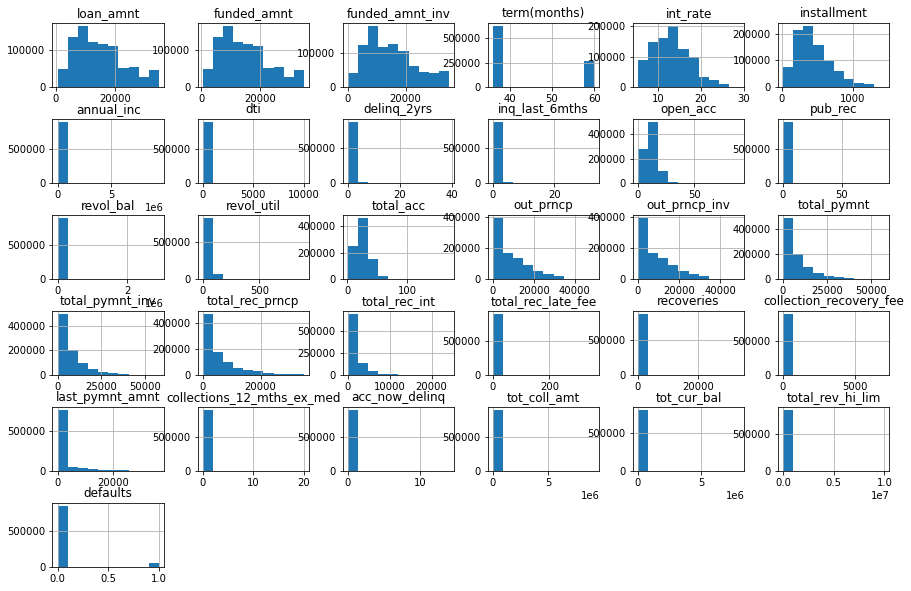

In [67]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [68]:
df['annual_inc'].max()

9500000.0

Looking at the distributions of many of these columns, there are many columns with a lot of zero values. Also, the max annual income is 9,500,000 which seems to be an outlier(maybe a missing decimal). How many annual income fields do we have that are over 1,000,000?

In [69]:
sum(df['annual_inc']>=1000000)

182

So, there are 180+ applicants that are making over 1,000,000 per year. That does not seem right to me. Here I am going to delete the rows reporting income of over $1,000,000.

In [70]:
df = df[df['annual_inc'] < 1000000]
df.shape

(887193, 47)

## 2.14 Save the data<a id='2.14 Save the data'></a>

In [71]:
# save the data to a new csv file
df.to_csv('LC_cleaned.csv')
df_test.to_csv('LC_2016_2017_cleaned.csv')

## 2.15 Summary<a id='2.15 Summary'></a>
The training and test sets have the same columns and index now.

The columns that I changed in the training set have also been changed in the test set.

I still have not decided how to handle some of the object fields like 'title', 'purpose', 'grade', etc. I don't know if these columns can be useful so I've decided to keep them for now. 

I have filled missing values in many of the columns but I have not decided how to handle all of the missing values. 
